# Measures of Distribution Shape

The principal measure of distribution shape used in statistics are skewness and kurtosis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **school**: student's school (***`binary`***: 'GP' or 'MS')
- **sex**: student's sex (***`binary`***: 'F' - female or 'M' - male)
- **age**: student's age (***`numeric`***: from 15 to 22)
- **studytime**: weekly study time (***`numeric`***: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **schoolsup**: extra educational support (***`binary`***: yes or no)
- **internet**: Internet access at home (***`binary`***: yes or no)
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [3]:
data = data[['school','sex','age','studytime','schoolsup','internet','G1','G2','G3']]
print(data.shape)
data.head()

(395, 9)


,school,sex,age,studytime,schoolsup,internet,G1,G2,G3
0,GP,F,18,2,yes,no,5,6,6
1,GP,F,17,2,no,yes,5,5,6
2,GP,F,15,2,yes,yes,7,8,10
3,GP,F,15,3,no,yes,15,14,15
4,GP,F,16,2,no,no,6,10,10


## Skewness

**Skewness** refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. 

If the curve is shifted to the left or to the right, it is said to be skewed. 

Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

- skewness = 0: normally distributed.
- skewness > 0: more weight in the left tail of the distribution.
- skewness < 0: more weight in the right tail of the distribution. 

The formula is: $skewness = 3 * (Mean - Median) / Std$

In [4]:
from scipy.stats import skew

Normal Distribution (0,1)

In [5]:
n01 = np.random.normal(0,1,100000)

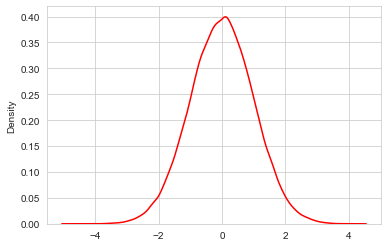

In [6]:
sns.kdeplot(n01, shade=False, color='red');

In [7]:
s = str(round(skew(n01),4))
s

'-0.0149'

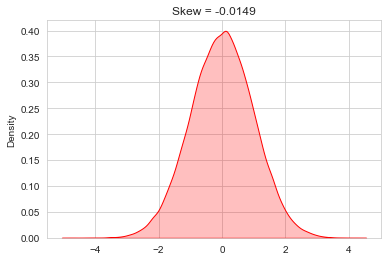

In [8]:
sns.kdeplot(n01, shade=True, color='red').set(title='Skew = '+s);

- The skewness for a normal distribution is zero. A symmetric distribution have a skewness near zero.

- Negative values for the skewness indicate data that are skewed left.

- Positive values for the skewness indicate data that are skewed right.

In [9]:
spos = np.random.lognormal(0,1,1000)

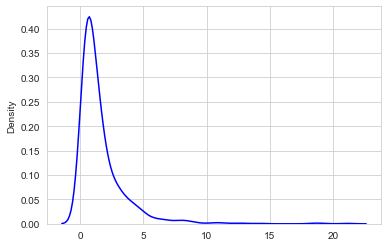

In [10]:
sns.kdeplot(spos, shade=False, color='blue');

In [11]:
s2 = str(round(skew(spos),4))
s2

'3.9964'

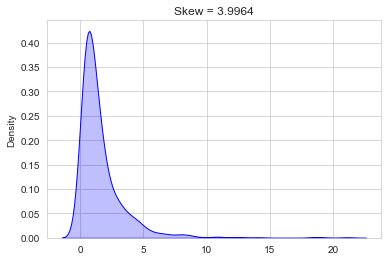

In [12]:
sns.kdeplot(spos, shade=True, color='blue').set(title='Skew = '+s2);

In [13]:
sneg = -np.random.lognormal(0,1,1000)

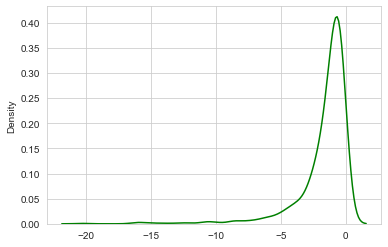

In [14]:
sns.kdeplot(sneg, shade=False, color='green');

In [15]:
s3 = str(round(skew(sneg),4))
s3

'-3.7129'

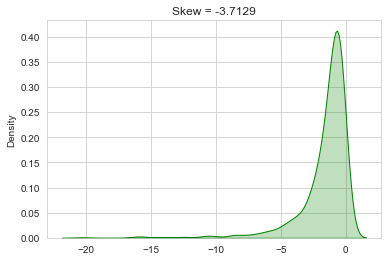

In [16]:
sns.kdeplot(sneg, shade=True, color='green').set(title='Skew = '+s3);

In [17]:
print('Skewness of G1 = %.4f' %(skew(data.G1)))
print('Skewness of G2 = %.4f' %(skew(data.G2)))
print('Skewness of G3 = %.4f' %(skew(data.G3)))

Skewness of G1 = 0.2397
Skewness of G2 = -0.4300
Skewness of G3 = -0.7299


## Kurtosis


It is the sharpness of the peak of a frequency-distribution curve.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

 The kurtosis of a distribution is in one of three categories of classification:

 - **Mesokurtic**: it is a distribution that has tails shaped in roughly the same way as any normal distribution

 - **Leptokurtic**: it is a distribution that has kurtosis greater than a mesokurtic distribution. Leptokurtic distributions are named by the prefix "lepto" meaning "skinny."

 - **Platykurtic**: it is a distribution that has kurtosis lesser than a mesokurtic distribution. The name of these types of distributions come from the meaning of the prefix "platy" meaning "broad."

In [18]:
from scipy.stats import kurtosis

In [19]:
print('Mesokurtic Curve - Kurtosis = %.2f' %kurtosis(n01))

Mesokurtic Curve - Kurtosis = 0.01


In [20]:
n04  = np.random.normal(0,4,100000) 
n005 = np.random.normal(0,0.5,100000)

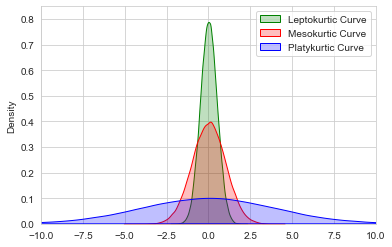

In [21]:
plt.ylim(0,0.85)
plt.xlim(-10,10)
sns.kdeplot(n005, shade=True, color='green', label='Leptokurtic Curve')
sns.kdeplot(n01,  shade=True, color='red',   label='Mesokurtic Curve')
sns.kdeplot(n04,  shade=True, color='blue',  label='Platykurtic Curve')
plt.legend();

In [22]:
print('Kurtosis of G1 = %.4f' %(kurtosis(data.G1)))
print('Kurtosis of G2 = %.4f' %(kurtosis(data.G2)))
print('Kurtosis of G3 = %.4f' %(kurtosis(data.G3)))

Kurtosis of G1 = -0.7002
Kurtosis of G2 = 0.6046
Kurtosis of G3 = 0.3832


Distributions with Skewness and Kurtosis values between -1 and 1 are reasonably close to normal. 

## Measures for type = object

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   sex        395 non-null    object
 2   age        395 non-null    int64 
 3   studytime  395 non-null    int64 
 4   schoolsup  395 non-null    object
 5   internet   395 non-null    object
 6   G1         395 non-null    int64 
 7   G2         395 non-null    int64 
 8   G3         395 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.9+ KB


In [24]:
data_o = data[['school','sex','schoolsup','internet']]
data_o.head()

,school,sex,schoolsup,internet
0,GP,F,yes,no
1,GP,F,no,yes
2,GP,F,yes,yes
3,GP,F,no,yes
4,GP,F,no,no


The following variables are 'object':
- school
- sex 
- schoolsup
- internet

Let's calculate the unique elements of those variables:

In [25]:
print('Values of "school":   ', data_o.school.unique())
print('Values of "sex":      ', data_o.sex.unique())
print('Values of "schoolsup":', data_o.schoolsup.unique())
print('Values of "internet": ', data_o.internet.unique())

Values of "school":    ['GP' 'MS']
Values of "sex":       ['F' 'M']
Values of "schoolsup": ['yes' 'no']
Values of "internet":  ['no' 'yes']


Let's find the mode:

In [26]:
print('Mode of "school":   ', data_o.school.mode()[0])
print('Mode of "sex":      ', data_o.sex.mode()[0])
print('Mode of "schoolsup":', data_o.schoolsup.mode()[0])
print('Mode of "internet": ', data_o.internet.mode()[0])

Mode of "school":    GP
Mode of "sex":       F
Mode of "schoolsup": no
Mode of "internet":  yes


Let's plot bar graphs to verify the results:

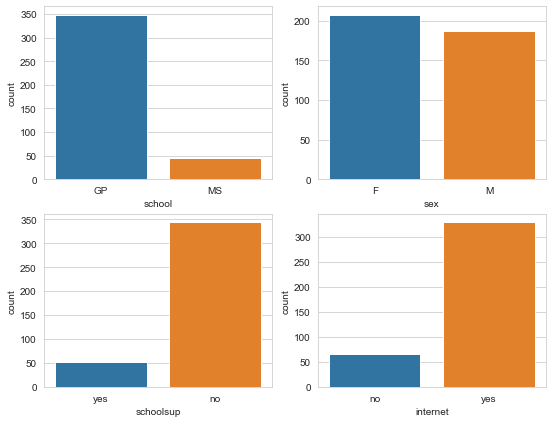

In [27]:
plt.figure(figsize=(9,7))
i=1
for c in data_o.columns:
    plt.subplot(2,2,i)
    sns.countplot(x=data_o[c]);
    #data_o[c].value_counts().plot(kind='bar');
    i += 1

**Pandas describe()** is used to view some basic statistical details like mean, std, quartiles, among other for numerical variables.

In [28]:
data.describe()

,age,studytime,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,10.908861,10.713924,10.415190
std,1.276043,0.839240,3.319195,3.761505,4.581443
min,15.000000,1.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,19.000000,19.000000,20.000000


You can use **describe(include='all')** to include the 'object' variables.

In [29]:
data.describe(include='all')

,school,sex,age,studytime,schoolsup,internet,G1,G2,G3
count,395,395,395.000000,395.000000,395,395,395.000000,395.000000,395.000000
unique,2,2,NaN,NaN,2,2,NaN,NaN,NaN
top,GP,F,NaN,NaN,no,yes,NaN,NaN,NaN
freq,349,208,NaN,NaN,344,329,NaN,NaN,NaN
mean,NaN,NaN,16.696203,2.035443,NaN,NaN,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,0.839240,NaN,NaN,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,1.000000,NaN,NaN,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,1.000000,NaN,NaN,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,2.000000,NaN,NaN,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,2.000000,NaN,NaN,13.000000,13.000000,14.000000


Or you can use **include='object'** to display only measures of object variables.

In [30]:
data.describe(include='object')

,school,sex,schoolsup,internet
count,395,395,395,395
unique,2,2,2,2
top,GP,F,no,yes
freq,349,208,344,329


The four 'object' variables have 395 values; that is, they do not have missing data. All of them have two values. The 'top' option shows the mode value, and 'freq' shows its number of cases. You can use 'value_counts' to verify the results.

The school 'GP' has the most of the students, with 349.

In [31]:
data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [32]:
data.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [33]:
data.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [34]:
data.internet.value_counts()

yes    329
no      66
Name: internet, dtype: int64